In [1]:
import pandas as pd

## Section 1: Data Preprocessing and Descriptive Statistics

### 1.1 Data Loading and Inspection 

In [2]:
orders = pd.read_csv("df_Orders.csv")
customers = pd.read_csv("Ecommerce Order Dataset/df_Customers.csv")
payments = pd.read_csv("df_Payments_new.csv")
order_items = pd.read_csv("df_OrderItems_new.csv")
products=pd.read_csv("df_Products_new.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'df_Orders.csv'

In [ ]:
orders.info()
customers.info()
payments.info()
order_items.info()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int6

In [ ]:
orders.isnull().sum()
customers.isnull().sum()
payments.isnull().sum()
order_items.isnull().sum()
products.isnull().sum()

product_id        0
category          0
sub_category      0
stock_quantity    0
dtype: int64

### 1.2 Data Type Conversion and Parsing Dates 

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [ ]:
payments['payment_value'] = payments['payment_value'].astype(float)
order_items['price'] = order_items['price'].astype(float)

In [ ]:
orders.info()
customers.info()
payments.info()
order_items.info()
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
dtypes: datetime64[ns](4), object(3)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_

### 1.3 Data Integration 

In [ ]:
orders_full = orders.merge(customers, on='customer_id', how='left')  
orders_full= orders_full.merge(payments, on='order_id', how='left') 
orders_full=orders_full.merge(order_items, on='order_id', how='left') 
orders_full=orders_full.merge(products, on='product_id', how='left') 

In [ ]:
orders_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 23 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_timestamp      datetime64[ns]
 6   order_estimated_delivery_date  datetime64[ns]
 7   customer_zip_code_prefix       int64         
 8   customer_city                  object        
 9   customer_state                 object        
 10  payment_sequential             int64         
 11  payment_type                   object        
 12  installments                   int64         
 13  payment_value                  float64       
 14  payment_status                 object        
 15  product_id     

### 1.4 Feature Engineering 

In [ ]:
orders_full['order_date'] = pd.to_datetime(orders_full['order_purchase_timestamp'])
orders_full['order_month'] = orders_full['order_date'].dt.month
orders_full['order_day'] = orders_full['order_date'].dt.day
orders_full['order_hour'] = orders_full['order_date'].dt.hour

In [ ]:
orders_full['order_value'] = orders_full['price'] * orders_full['quantity']

In [ ]:
orders_full['shipping_cost_ratio'] = orders_full['freight_value'] / orders_full['order_value']


In [ ]:
orders_full['delivery_time'] = (orders_full['order_delivered_timestamp'] - orders_full['order_approved_at']).dt.days

In [ ]:
orders['estimated_vs_actual_delivery'] = orders['order_estimated_delivery_date'] - orders['order_delivered_timestamp'] 

### 1.5 Descriptive Statistics 

In [ ]:
print("Mean Order Value:", orders_full['order_value'].mean())
print("Median Order Value:", orders_full['order_value'].median())
print("Mode Order Value:", orders_full['order_value'].mode())

Mean Order Value: 547.4749439767602
Median Order Value: 153.75
Mode Order Value: 0    692.0
Name: order_value, dtype: float64


In [ ]:
print("Mean Payment Value:", orders_full['payment_value'].mean())
print("Median Payment Value:", orders_full['payment_value'].median())
print("Mode Payment Value:", orders_full['payment_value'].mode())

Mean Payment Value: 282.8276905268503
Median Payment Value: 174.36
Mode Payment Value: 0    665.87
Name: payment_value, dtype: float64


In [ ]:
print("Min Freight Value:", orders_full['freight_value'].min())
print("Max Freight Value:", orders_full['freight_value'].max())
print("Freight Range:", orders_full['freight_value'].max() - orders_full['freight_value'].min())


Min Freight Value: 0.0
Max Freight Value: 409.68
Freight Range: 409.68


In [ ]:
print("Min Quantity:", orders_full['installments'].min())
print("Max Quantity:", orders_full['installments'].max())
print("Quantity Range:", orders_full['installments'].max() - orders_full['installments'].min())


Min Quantity: 0
Max Quantity: 24
Quantity Range: 24


In [ ]:
print("Std of Freight Value:", orders_full['freight_value'].std())
print("Variance of Freight Value:", orders_full['freight_value'].var())

Std of Freight Value: 37.068425555228664
Variance of Freight Value: 1374.0681731435297


In [ ]:
print("Std of Payment Value:", orders_full['payment_value'].std())
print("Variance of Payment Value:", orders_full['payment_value'].var())

Std of Payment Value: 363.8869053273351
Variance of Payment Value: 132413.67986870496


In [ ]:
print("Std of Delivery Time:", orders_full['delivery_time'].std())
print("Variance of Delivery Time:", orders_full['delivery_time'].var())

Std of Delivery Time: 9.242350475350339
Variance of Delivery Time: 85.42104230920864


In [ ]:
print("Unique Products:", orders_full['product_id'].nunique())
print("Unique Categories:", orders_full['category'].nunique())
print("Unique Payment Types:", orders_full['payment_type'].nunique())
print("Unique Order Statuses:", orders_full['order_status'].nunique())

Unique Products: 27451
Unique Categories: 51
Unique Payment Types: 4
Unique Order Statuses: 7


In [ ]:
print("Payment Type Frequency:\n", orders_full['payment_type'].value_counts())
print("Order Status Frequency:\n", orders_full['order_status'].value_counts())

Payment Type Frequency:
 payment_type
credit_card    1822547
wallet          544164
voucher         131220
debit_card       31555
Name: count, dtype: int64
Order Status Frequency:
 order_status
delivered      2493462
shipped          27355
canceled          4199
invoiced          2623
processing        1823
unavailable         22
approved             2
Name: count, dtype: int64


In [ ]:
print("Skewness - Payment Value:", orders_full['payment_value'].skew())
print("Kurtosis - Payment Value:", orders_full['payment_value'].kurtosis())

Skewness - Payment Value: 3.751765246579947
Kurtosis - Payment Value: 21.57112013829063


In [ ]:
print("Skewness - Order Value:", orders_full['order_value'].skew())
print("Kurtosis - Order Value:", orders_full['order_value'].kurtosis())

Skewness - Order Value: 2.7206963324548816
Kurtosis - Order Value: 6.7224609416768075


### 1.6 Handling Missing Values 

In [ ]:
orders_full.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  199
order_delivered_timestamp        36051
order_estimated_delivery_date        0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
payment_sequential                   0
payment_type                         0
installments                         0
payment_value                        0
payment_status                       0
product_id                           0
seller_id                            0
price                                0
freight_value                        0
quantity                             0
category                             0
sub_category                         0
stock_quantity                       0
order_date                           0
order_month                          0
order_day                

In [ ]:
orders_full['order_approved_at'] = orders_full['order_approved_at'].fillna(orders_full['order_purchase_timestamp'])

In [ ]:
import numpy as np

orders_full['order_delivered_timestamp'] = orders_full['order_delivered_timestamp'].fillna(np.nan)

In [ ]:
orders_full['order_delivered_timestamp'].isna().sum()

36051

In [ ]:
orders_full['delivery_time'] = (orders_full['order_delivered_timestamp'] - orders_full['order_approved_at']).dt.days

In [ ]:
orders_full['delivery_time'].isna().sum()

36051

In [ ]:
orders_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 30 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_timestamp      datetime64[ns]
 6   order_estimated_delivery_date  datetime64[ns]
 7   customer_zip_code_prefix       int64         
 8   customer_city                  object        
 9   customer_state                 object        
 10  payment_sequential             int64         
 11  payment_type                   object        
 12  installments                   int64         
 13  payment_value                  float64       
 14  payment_status                 object        
 15  product_id     

# Section 2 Exploratory Data Analysis (EDA) for Data Understanding 

## 2.1 Univariate Aalysis

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
orders_full['order_value'].describe().astype('int')

count    2529486
mean         547
std          938
min            0
25%           71
50%          153
75%          517
max         6735
Name: order_value, dtype: int32

In [ ]:
orders_full['payment_value'].describe().astype('int')

count    2529486
mean         282
std          363
min            0
25%           82
50%          174
75%          326
max         7274
Name: payment_value, dtype: int32

(array([1.181754e+06, 3.390420e+05, 1.676530e+05, 2.290220e+05,
        2.617400e+04, 2.352920e+05, 5.053100e+04, 1.552600e+04,
        1.789300e+04, 1.821000e+03, 2.131000e+03, 2.101500e+04,
        2.552000e+03, 1.193000e+03, 1.370300e+04, 4.034500e+04,
        1.964000e+03, 4.530000e+02, 1.040000e+02, 4.031000e+03,
        3.781000e+03, 7.030500e+04, 9.250000e+02, 1.100000e+01,
        0.000000e+00, 6.100000e+01, 1.000000e+00, 6.800000e+01,
        1.800000e+01, 5.420000e+02, 1.012840e+05, 0.000000e+00,
        3.000000e+00, 0.000000e+00, 2.740000e+02, 1.100000e+01,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 2.000000e+00]),
 array([8.500000e-01, 1.355330e+02, 2.702160e+02, 4.048990e+02,
        5.395820e+02, 6.742650e+02, 8.089480e+02, 9.436310e+02,
        1.078314e+03, 1.212997e+03, 1.347680e+03, 1.482363e+03,
  

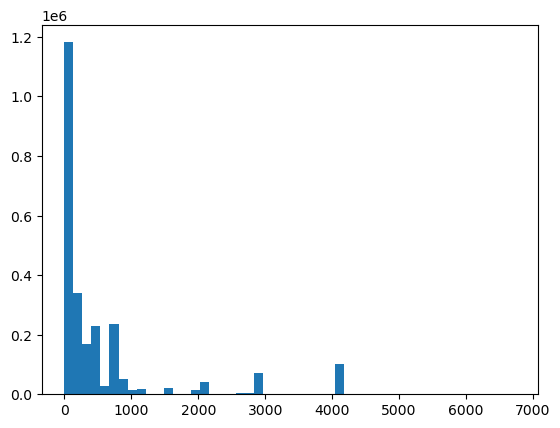

In [ ]:
plt.hist(orders_full['order_value'], bins=50)

In [ ]:
orders_full['freight_value'].describe()

count    2.529486e+06
mean     4.273112e+01
std      3.706843e+01
min      0.000000e+00
25%      1.840000e+01
50%      3.391000e+01
75%      5.442000e+01
max      4.096800e+02
Name: freight_value, dtype: float64

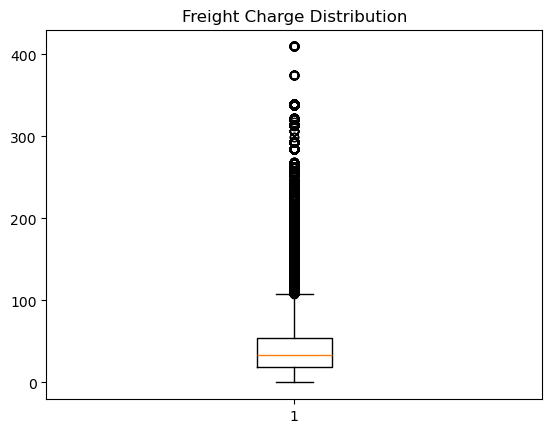

In [ ]:
plt.boxplot(orders_full['freight_value'])
plt.title('Freight Charge Distribution')
plt.show()

In [ ]:
orders_full.groupby('order_status')['freight_value'].mean().sort_values(ascending=False)

order_status
approved       56.655000
unavailable    52.898182
invoiced       46.237545
processing     45.589281
shipped        44.252075
delivered      42.723240
canceled       34.011238
Name: freight_value, dtype: float64

This suggests freight cost alone is not causing order cancellation.

<Axes: xlabel='items_per_order', ylabel='Count'>

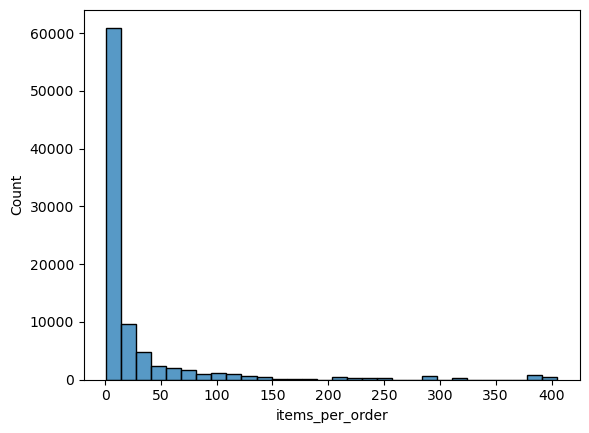

In [ ]:
order_qty = orders_full.groupby('order_id')['product_id'].count().reset_index(name='items_per_order')
order_qty['items_per_order'].value_counts().sort_index()
sns.histplot(order_qty['items_per_order'], bins=30)

In [ ]:
orders_full.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False)

customer_state
SP    37879
RJ    11578
MG    10334
RS     4921
PR     4523
SC     3213
BA     3088
GO     1868
ES     1798
DF     1793
PE     1493
CE     1141
MT      848
PA      817
MS      637
MA      623
PB      497
PI      423
RN      381
AL      342
SE      305
TO      247
RO      241
AM      140
AC       75
AP       68
RR       43
Name: order_id, dtype: int64

<Axes: xlabel='customer_state'>

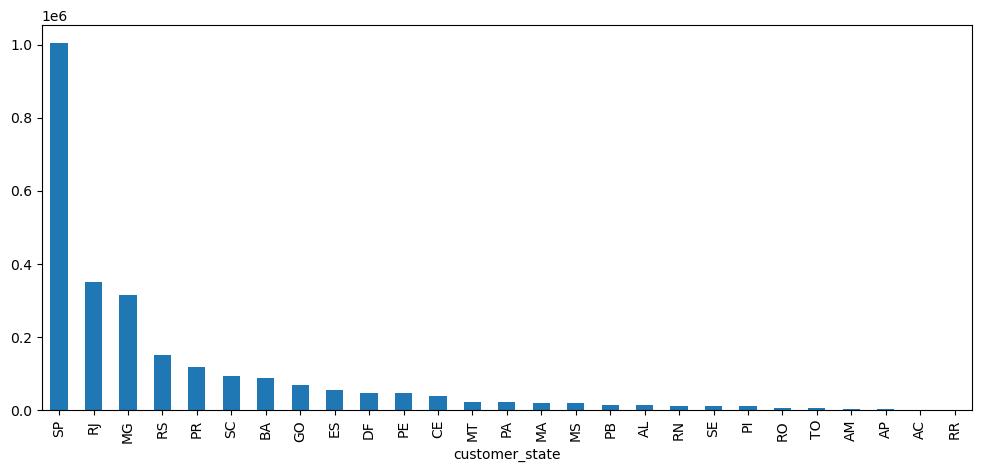

In [ ]:
orders_full['customer_state'].value_counts().plot(kind='bar', figsize=(12, 5))

In [ ]:
orders_full['category'].value_counts().head()

category
toys         1869621
health        161543
computers     103222
garden         96819
watches        81796
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category'>

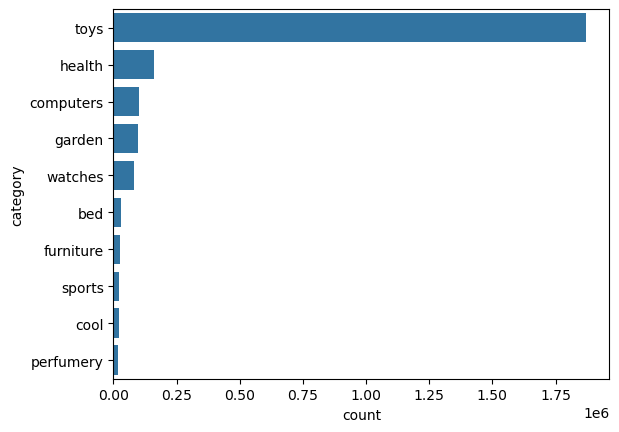

In [ ]:
sns.countplot(y='category', data=orders_full, order=orders_full['category'].value_counts().index[:10])

In [ ]:
orders_full.groupby('order_status')['order_status'].value_counts()

order_status
approved             2
canceled          4199
delivered      2493462
invoiced          2623
processing        1823
shipped          27355
unavailable         22
Name: count, dtype: int64

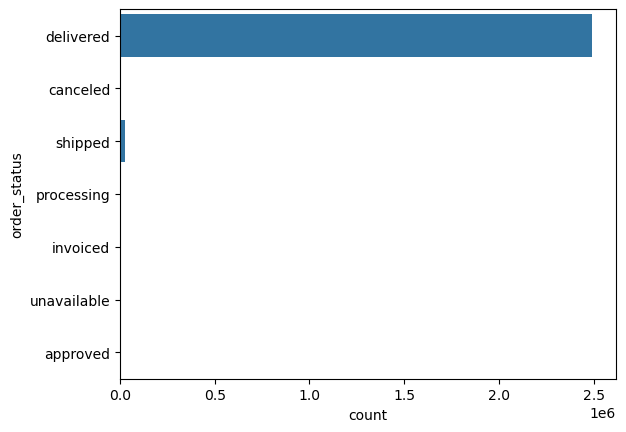

In [ ]:
sns.countplot(data = orders_full, y = 'order_status')
plt.show()

In [ ]:
orders_full.groupby('payment_type')['payment_type'].value_counts()

payment_type
credit_card    1822547
debit_card       31555
voucher         131220
wallet          544164
Name: count, dtype: int64

## 2.2 Bivariate Analysis

In [ ]:
orders_full['payment_difference'] = orders_full['payment_value'] - orders_full['order_value']
orders_full[['payment_difference', 'payment_value', 'order_value']].describe().astype('int')

,payment_difference,payment_value,order_value
count,2529486,2529486,2529486
mean,-264,282,547
std,998,363,938
min,-6669,0,0
25%,-344,82,71
50%,-17,174,153
75%,144,326,517
max,7049,7274,6735


In 50% of transactions, payment value is less than order_value. It may be due to discount coupons

In [ ]:
orders_full[['order_value', 'freight_value']].corr()


,order_value,freight_value
order_value,1.000000,0.010179
freight_value,0.010179,1.000000


There is no relationship between order_value and freight_value

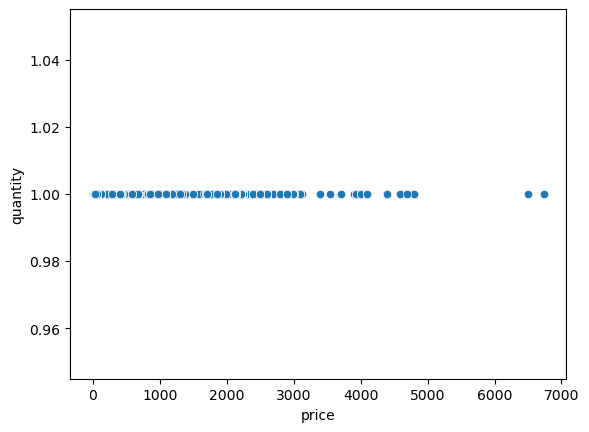

In [ ]:
## Doubt
sns.scatterplot(data=orders_full, x='price', y='quantity')
plt.show()

In [ ]:
orders_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529486 entries, 0 to 2529485
Data columns (total 31 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   order_id                       object        
 1   customer_id                    object        
 2   order_status                   object        
 3   order_purchase_timestamp       datetime64[ns]
 4   order_approved_at              datetime64[ns]
 5   order_delivered_timestamp      datetime64[ns]
 6   order_estimated_delivery_date  datetime64[ns]
 7   customer_zip_code_prefix       int64         
 8   customer_city                  object        
 9   customer_state                 object        
 10  payment_sequential             int64         
 11  payment_type                   object        
 12  installments                   int64         
 13  payment_value                  float64       
 14  payment_status                 object        
 15  product_id     

In [ ]:
orders_full.pivot_table(values='order_value', aggfunc='mean', index = 'customer_state').sort_values(by='order_value', ascending = False)

,order_value
customer_state,
RO,1057.724223
GO,833.458587
TO,785.179072
MT,700.932127
CE,686.361349
PA,646.969246
SE,639.754731
MG,614.014693
BA,606.047372


In [ ]:
pd.crosstab(index = orders_full.category, columns=orders_full.order_status, normalize="index") * 100

order_status,approved,canceled,delivered,invoiced,processing,shipped,unavailable
category,,,,,,,
agro,0.000000,0.000000,99.735799,0.000000,0.000000,0.264201,0.000000
air,0.000000,1.075269,98.924731,0.000000,0.000000,0.000000,0.000000
art,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
arts,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
audio,0.000000,1.306185,98.386477,0.000000,0.000000,0.307338,0.000000
auto,0.000000,0.038063,98.220573,0.009516,0.076125,1.655724,0.000000
baby,0.000000,0.325362,96.583699,0.097609,0.065072,2.911990,0.016268
bed,0.000000,0.003303,99.081842,0.122201,0.013211,0.779444,0.000000
books,0.000000,0.120773,97.222222,0.301932,0.241546,2.113527,0.000000


Consoles and stationary are canceled more as compare to other product category

## 2.3 Time based analysis

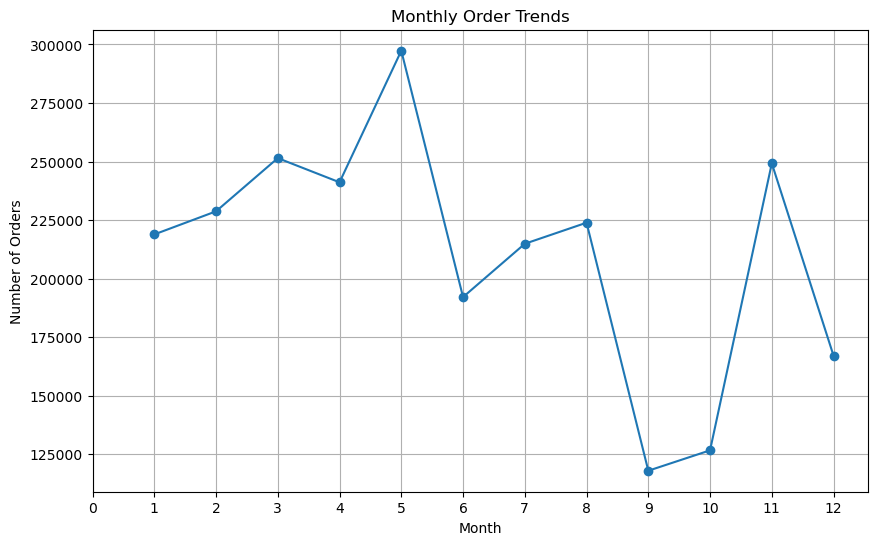

In [ ]:
monthly_orders = orders_full.groupby('order_month').size()
monthly_orders.plot(kind='line', marker='o', figsize=(10, 6), title='Monthly Order Trends')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks([i for i in range(13)])
plt.show()

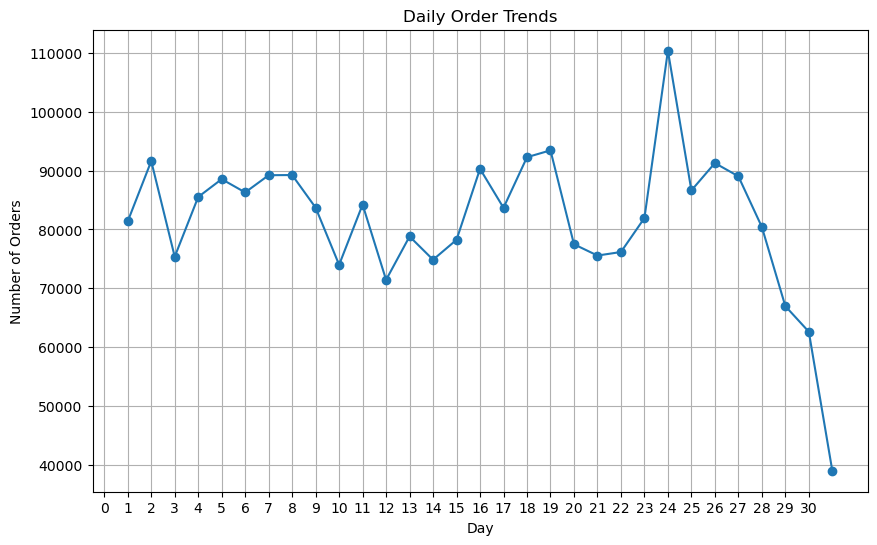

In [ ]:
monthly_orders = orders_full.groupby('order_day').size()
monthly_orders.plot(kind='line', marker='o', figsize=(10, 6), title='Daily Order Trends')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks([i for i in range(31)])
plt.show()

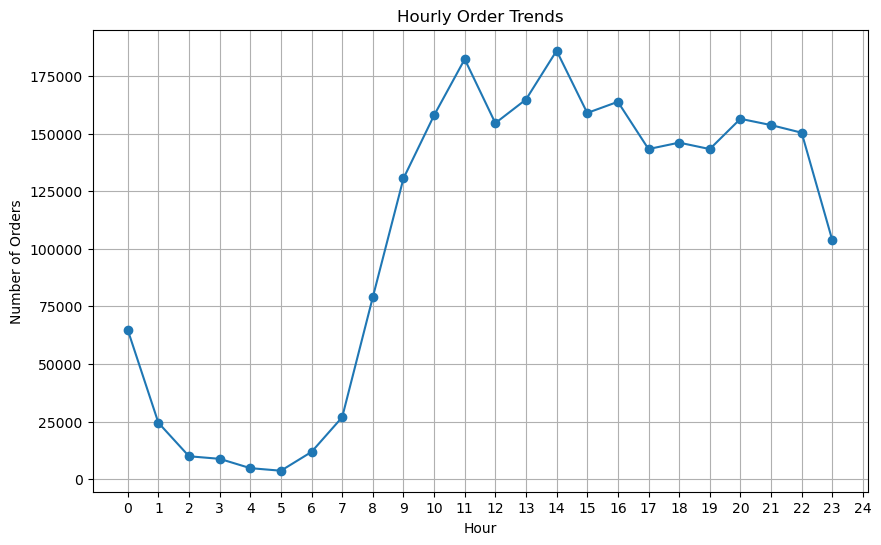

In [ ]:
monthly_orders = orders_full.groupby('order_hour').size()
monthly_orders.plot(kind='line', marker='o', figsize=(10, 6), title='Hourly Order Trends')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.xticks([i for i in range(25)])
plt.show()

In [ ]:
orders_full['delivery_performance'] = (orders_full['order_delivered_timestamp'] - orders_full['order_estimated_delivery_date']).dt.days
print("Average delay (days):", orders_full['delivery_performance'].mean())
print("Median delay (days):", orders_full['delivery_performance'].median())
print("Max delay (days):", orders_full['delivery_performance'].max())
print("Min (earliest) delivery (days):", orders_full['delivery_performance'].min())

Average delay (days): -11.414473206640638
Median delay (days): -12.0
Max delay (days): 188.0
Min (earliest) delivery (days): -147.0


## 2.4 Segment-Specific Trend

In [ ]:
customer_spend = orders_full.groupby(['customer_id', 'customer_state'])['order_value'].sum().reset_index()
customer_spend.rename(columns={'order_value': 'total_spend'}, inplace=True)
# Cut into 3 tiers: Low, Medium, High
customer_spend['spend_segment'] = pd.qcut(customer_spend['total_spend'], q=3, labels=['Low', 'Medium', 'High'])
segment_by_state = customer_spend.groupby(['customer_state', 'spend_segment']).size().unstack().fillna(0)
print(segment_by_state)

spend_segment     Low  Medium   High
customer_state                      
AC                 33      26     16
AL                114     115    113
AM                 44      50     46
AP                 19      27     22
BA               1006    1045   1037
CE                356     390    395
DF                615     614    564
ES                601     598    599
GO                599     594    675
MA                193     217    213
MG               3494    3355   3485
MS                228     198    211
MT                296     274    278
PA                276     277    264
PB                173     151    173
PE                459     497    537
PI                166     139    118
PR               1529    1466   1528
RJ               3867    3822   3889
RN                114     127    140
RO                 75      81     85
RR                 12      22      9
RS               1521    1673   1727
SC               1099    1023   1091
SE                107      95    103
S

C:\Users\panda\AppData\Local\Temp\ipykernel_28220\1723446196.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_by_state = customer_spend.groupby(['customer_state', 'spend_segment']).size().unstack().fillna(0)
